In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Q_orig(d, alpha, r, r0):
     return (d / 2) * (1.5 * np.exp(-2 * alpha * (r - r0)) - np.exp(-alpha * (r - r0)))
    
def J_orig(d, alpha, r, r0):
     return (d / 4) * (np.exp(-2 * alpha * (r - r0)) - 6 * np.exp(-alpha * (r - r0)))

In [3]:
def V_LEPS(rAB, rBC):
    a = 0.05
    b = 0.30
    c = 0.05
    dAB = dBC = 4.746
    dAC = 3.445
    r0 = 0.742
    alpha = 1.942
    QAB = Q_orig(dAB, alpha, rAB, r0)
    QBC = Q_orig(dBC, alpha, rBC, r0)
    rAC = rAB + rBC
    QAC = Q_orig(dAC, alpha, rAC, r0)
    Q_values = (QAB / (1 + a)) + (QBC / (1 + b)) + (QAC / (1 + c)) 
    
    JAB = J_orig(dAB, alpha, rAB, r0)
    JBC = J_orig(dBC, alpha, rBC, r0)
    JAC = J_orig(dAC, alpha, rAC, r0)
    J_values = (JAB / (1 + a))**2 + (JBC / (1 + b))**2 + (JAC / (1 + c))**2
    J_values = J_values - ((JAB*JBC/((1+a)*(1+b))) + (JBC*JAC/((1+b)*(1+c))) + (JAB*JAC/((1+a)*(1+c))))
    return Q_values - np.sqrt(J_values)

def V_LEPS_II(rAB, x):
    rAC = 3.742
    kC = 0.2025
    V_normal = V_LEPS(rAB, rAC - rAB)
    c = 1.154
    return V_normal + 2 * kC * (rAB - (rAC / 2 - x / c))**2

In [4]:
rAB, rBC = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(0.2, 4.1, 0.05))

l = rAB.flatten().shape[0]
LEPS = np.zeros(l)
for i in np.arange(l):
    LEPS[i] = V_LEPS(rAB.flatten()[i], rBC.flatten()[i])
LEPS = LEPS.reshape(rAB.shape)

rAB_II, x = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(-2, 1.5, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_II = np.zeros(l)
for i in np.arange(l):
    LEPS_II[i] = V_LEPS_II(rAB_II.flatten()[i], x.flatten()[i])
LEPS_II = LEPS_II.reshape(rAB_II.shape)

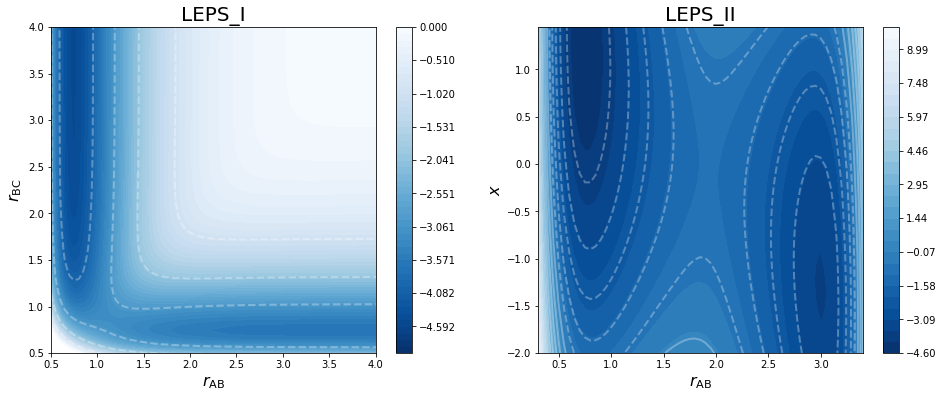

In [5]:
fig = plt.figure(figsize = (16, 6))

ax = fig.add_subplot(1, 2, 1)
C = plt.contourf(rAB, rBC, LEPS, levels = np.linspace(-5.0, 0.0, 50), cmap="Blues_r")
plt.colorbar()
ax.contour(rAB, rBC, LEPS, levels = np.linspace(-5.0, 0.0, 6), colors='white', alpha = 0.3, linewidths = 2)
ax.set_xlim(0.5, 4.0)
ax.set_ylim(0.5, 4.0)
ax.set_title("LEPS_I", fontsize = 20)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$r_\mathrm{BC}$', fontsize = 16)

ax = fig.add_subplot(1, 2, 2)
C = plt.contourf(rAB_II, x, LEPS_II, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
plt.colorbar()
ax.contour(rAB_II, x, LEPS_II, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("LEPS_II", fontsize = 20)
_ = ax.set_xlim(0.3, 3.4)

## Defining force for both LEPS potentials

In [6]:
class Q:
    def __init__(self, d, alpha, r0):
        self.d = d
        self.alpha = alpha
        self.r0 = r0
    
    def value(self, r):
        d = self.d
        alpha = self.alpha
        r0 = self.r0
        return (d / 2) * (1.5 * np.exp(-2 * alpha * (r - r0)) - np.exp(-alpha * (r - r0)))
    
    def der(self, r):
        d = self.d
        alpha = self.alpha
        r0 = self.r0
        return (-d * alpha / 2) * (3 * np.exp(-2 * alpha * (r - r0)) - np.exp(-alpha * (r - r0)))

class J:
    def __init__(self, d, alpha, r0):
        self.d = d
        self.alpha = alpha
        self.r0 = r0
        
    def value(self, r):
        d = self.d
        alpha = self.alpha
        r0 = self.r0
        return (d / 4) * (np.exp(-2 * alpha * (r - r0)) - 6 * np.exp(-alpha * (r - r0)))
    
    def der(self, r):
        d = self.d
        alpha = self.alpha
        r0 = self.r0
        return (-d * alpha / 2) * (np.exp(-2 * alpha * (r - r0))  - 3 * np.exp(-alpha * (r - r0)))

In [7]:
class LEPS_I:
    a = 0.05
    b = 0.30
    c = 0.05
    dAB = dBC = 4.746
    dAC = 3.445
    r0 = 0.742
    alpha = 1.942
    
    def __init__(self):
        pass
    
    def V(self, rAB, rBC):
        
        QAB = Q(self.dAB, self.alpha, self.r0).value(rAB)
        QBC = Q(self.dBC, self.alpha, self.r0).value(rBC)
        rAC = rAB + rBC
        QAC = Q(self.dAC, self.alpha, self.r0).value(rAC)
        
        JAB = J(self.dAB, self.alpha, self.r0).value(rAB)
        JBC = J(self.dBC, self.alpha, self.r0).value(rBC)
        JAC = J(self.dAC, self.alpha, self.r0).value(rAC)
        
        a = self.a
        b = self.b
        c = self.c
        Q_values = (QAB / (1 + a)) + (QBC / (1 + b)) + (QAC / (1 + c)) 
        J_values = (JAB / (1 + a))**2 + (JBC / (1 + b))**2 + (JAC / (1 + c))**2
        J_values = J_values - ((JAB*JBC/((1+a)*(1+b))) + (JBC*JAC/((1+b)*(1+c))) + (JAB*JAC/((1+a)*(1+c))))
        return Q_values - np.sqrt(J_values)
    
    def F(self, rAB, rBC):
        a = self.a
        b = self.b
        c = self.c
        rAC = rAB + rBC
        J_AB = J(self.dAB, self.alpha, self.r0)
        J_BC = J(self.dBC, self.alpha, self.r0)
        J_AC = J(self.dAC, self.alpha, self.r0)
        
        # Computing F_x
        F_x = Q(self.dAB, self.alpha, self.r0).der(rAB) / (1 + a)
        F_x += Q(self.dAC, self.alpha, self.r0).der(rAC) / (1 + c)
        
        comp_x = (2 * J_AB.value(rAB) * J_AB.der(rAB) / ((1 + a)**2) + 2 * J_AC.value(rAC) * J_AC.der(rAC) / ((1 + c)**2))
        comp_x -= (J_AB.der(rAB) * J_BC.value(rBC) / ((1 + a)*(1 + b)) + J_BC.value(rBC) * J_AC.der(rAC) / ((1 + b)*(1 + c)))
        comp_x -= ((J_AB.der(rAB) * J_AC.value(rAC) + J_AC.der(rAC) * J_AB.value(rAB)) / ((1 + a) * (1 + c)))
        
        jAB = J_AB.value(rAB)
        jBC = J_BC.value(rBC)
        jAC = J_AC.value(rAC)
        
        J_values = (jAB / (1 + a))**2 + (jBC / (1 + b))**2 + (jAC / (1 + c))**2
        J_values = J_values - ((jAB*jBC/((1+a)*(1+b))) + (jBC*jAC/((1+b)*(1+c))) + (jAB*jAC/((1+a)*(1+c))))
        comp_x *= 1 / (2 * np.sqrt(J_values))
        F_x -= comp_x
        
        # Computing F_y
        F_y = Q(self.dBC, self.alpha, self.r0).der(rBC) / (1 + b)
        F_y += Q(self.dAC, self.alpha, self.r0).der(rAC) / (1 + c)
        
        comp_y = (2 * J_BC.value(rBC) * J_BC.der(rBC) / ((1 + b)**2) + 2 * J_AC.value(rAC) * J_AC.der(rAC) / ((1 + c)**2))
        comp_y -= (J_AB.value(rAB) * J_BC.der(rBC) / ((1 + a)*(1 + b)) + J_AB.value(rAB) * J_AC.der(rAC) / ((1 + a)*(1 + c)))
        comp_y -= ((J_BC.der(rBC) * J_AC.value(rAC) + J_BC.value(rBC) * J_AC.der(rAC)) / ((1 + b) * (1 + c)))
        
        comp_y *= 1 / (2 * np.sqrt(J_values))
        F_y -= comp_y
        return np.array([-F_x, -F_y])

In [15]:
class LEPS_II(LEPS_I):
    rAC = 3.742
    kC = 0.2025
    c = 1.154
    
    def __init__(self):
        super().__init__()
        pass
    
    def V(self, rAB, x):
        
        V_normal = super().V(rAB, self.rAC - rAB)
        return V_normal + 2 * self.kC * (rAB - (self.rAC / 2 - x / self.c))**2
    
    def F(self, rAB, x):
        
        F_I = super().F(rAB, self.rAC - rAB)
        F_x = F_I[0] - F_I[1] - 4 * self.kC * (rAB - (self.rAC / 2 - x / self.c))
        
        F_y = -4 * (self.kC / self.c) * (rAB - (self.rAC / 2 - x / self.c)) 
        return np.array([F_x, F_y])

In [16]:
rAB, rBC = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(0.2, 4.1, 0.05))

l = rAB.flatten().shape[0]
LEPS = np.zeros(l)
for i in np.arange(l):
    LEPS[i] = LEPS_I().V(rAB.flatten()[i], rBC.flatten()[i])
LEPS = LEPS.reshape(rAB.shape)

rAB_II, x = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(-2, 1.5, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_II_arr = np.zeros(l)
for i in np.arange(l):
    LEPS_II_arr[i] = LEPS_II().V(rAB_II.flatten()[i], x.flatten()[i])
LEPS_II_arr = LEPS_II_arr.reshape(rAB_II.shape)

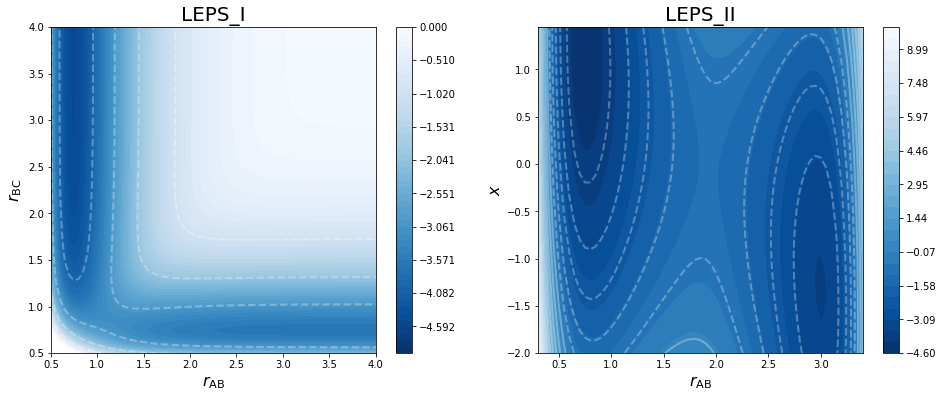

In [10]:
fig = plt.figure(figsize = (16, 6))

ax = fig.add_subplot(1, 2, 1)
C = plt.contourf(rAB, rBC, LEPS, levels = np.linspace(-5.0, 0.0, 50), cmap="Blues_r")
plt.colorbar()
ax.contour(rAB, rBC, LEPS, levels = np.linspace(-5.0, 0.0, 6), colors='white', alpha = 0.3, linewidths = 2)
ax.set_xlim(0.5, 4.0)
ax.set_ylim(0.5, 4.0)
ax.set_title("LEPS_I", fontsize = 20)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$r_\mathrm{BC}$', fontsize = 16)

ax = fig.add_subplot(1, 2, 2)
C = plt.contourf(rAB_II, x, LEPS_II_arr, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
plt.colorbar()
ax.contour(rAB_II, x, LEPS_II_arr, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("LEPS_II", fontsize = 20)
_ = ax.set_xlim(0.3, 3.4)

## NEB algorithm

In [113]:
class NEB:
    
    def __init__(self, k):
        self.k = k
        
        
    def interpolate(self, ini, fin, P = 20, dt = 1e-3):
        delta = (fin - ini) / P
        images = []
        for i in range(P):
            images.append(ini + i * delta)
        images.append(fin)
        self.images = images
        self.dt = dt
        
        
    def minimize(self, nsteps, F):
        if not hasattr(self, 'images'):
            print("Interpolate first!")
            return
        R = self.images
        P = len(R) - 1
        k = self.k
        for _ in range(nsteps):
            for i in range(1, P):
                q_hat = (R[i] - R[i - 1]) / np.linalg.norm(R[i] - R[i - 1]) + (R[i + 1] - R[i]) / np.linalg.norm(R[i + 1] - R[i])
                q_hat /= np.linalg.norm(q_hat)
#                 q_hat = (R[i + 1] - R[i - 1]) / np.linalg.norm(R[i + 1] - R[i - 1]) 
                f = F(*R[i]) - np.dot(F(*R[i]), q_hat) * q_hat
                f_spring = (k[i] * (R[i + 1] - R[i])  - k[i - 1] * (R[i] - R[i - 1]))
                f_spring = np.dot(f_spring, q_hat) * q_hat
                f += f_spring
                R[i] = R[i] + self.dt * f

In [114]:
ini = np.array([0.742, 4.0])
fin = np.array([4.0, 0.742])

P = 20
neb = NEB(np.full(P, 50.0))
neb.interpolate(ini, fin, P)
neb.minimize(2000, LEPS_I().F)

In [115]:
ini = np.array([0.742, 1.3])
fin = np.array([3.0, -1.2])

P = 20
neb_II = NEB(np.full(P, 30.0))
neb_II.interpolate(ini, fin, P)
neb_II.minimize(2000, LEPS_II().F)

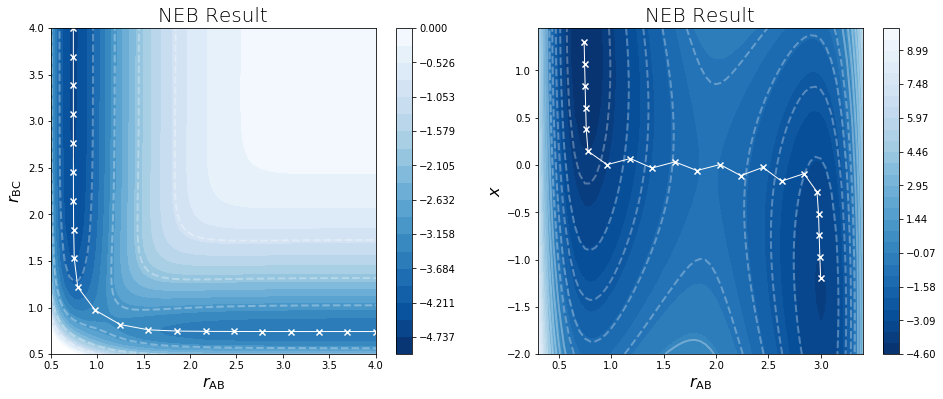

In [116]:
fig = plt.figure(figsize = (16, 6))

ax = fig.add_subplot(1, 2, 1)
C = plt.contourf(rAB, rBC, LEPS, levels = np.linspace(-5.0, 0.0, 20), cmap="Blues_r")
plt.colorbar()
ax.contour(rAB, rBC, LEPS, levels = np.linspace(-5.0, 0.0, 6), colors='white', alpha = 0.3, linewidths = 2)
ax.set_xlim(0.5, 4.0)
ax.set_ylim(0.5, 4.0)
ax.set_title("NEB Result", fontsize = 20, fontweight = 100)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$r_\mathrm{BC}$', fontsize = 16)
images = np.array(neb.images)
ax.scatter(images[:, 0], images[:, 1], color='white', marker = 'x')
ax.plot(images[:, 0], images[:, 1], color='white', linewidth = 1)

ax = fig.add_subplot(1, 2, 2)
C = plt.contourf(rAB_II, x, LEPS_II_arr, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
plt.colorbar()
ax.contour(rAB_II, x, LEPS_II_arr, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("NEB Result", fontsize = 20, fontweight = 100)
images = np.array(neb_II.images)
ax.scatter(images[:, 0], images[:, 1], color='white', marker = 'x')
ax.plot(images[:, 0], images[:, 1], color='white', linewidth = 1)
_ = ax.set_xlim(0.3, 3.4)

## Issues with the above implementation

- The perpendicular component of spring force is not included.
- Kinks form in regions where the parallel component of force is larger than the perpendicular component of force.
- This leads to kinks in the Minimum Energy Path, as can be seen in the second figure of the above plot

## Updated NEB implementation

In [122]:
class NEB:
    
    def __init__(self, k):
        self.k = k
        
        
    def interpolate(self, ini, fin, P = 20, dt = 1e-3):
        delta = (fin - ini) / P
        images = []
        for i in range(P):
            images.append(ini + i * delta)
        images.append(fin)
        self.images = images
        self.dt = dt
        
        
    def minimize(self, nsteps, F):
        def switch_function(phi):
            return 0.5 * (1 + np.cos(np.pi * np.cos(phi)))
        if not hasattr(self, 'images'):
            print("Interpolate first!")
            return
        R = self.images
        P = len(R) - 1
        k = self.k
        for _ in range(nsteps):
            for i in range(1, P):
                q_hat = (R[i] - R[i - 1]) / np.linalg.norm(R[i] - R[i - 1]) + (R[i + 1] - R[i]) / np.linalg.norm(R[i + 1] - R[i])
                q_hat /= np.linalg.norm(q_hat)
                phi_i = np.arccos(np.dot(R[i + 1] - R[i], R[i] - R[i - 1]) / np.linalg.norm(R[i + 1] - R[i]) * np.linalg.norm(R[i] - R[i - 1])) 
                f = F(*R[i]) - np.dot(F(*R[i]), q_hat) * q_hat
                f_spring = (k[i] * (R[i + 1] - R[i])  - k[i - 1] * (R[i] - R[i - 1]))
                f_spring_parallel = np.dot(f_spring, q_hat) * q_hat
                f_spring_perp = switch_function(phi_i) * (f_spring - f_spring_parallel)
                f += f_spring_parallel + f_spring_perp
                R[i] = R[i] + self.dt * f

In [123]:
ini = np.array([0.742, 1.3])
fin = np.array([3.0, -1.2])

P = 20
neb_switch_function = NEB(np.full(P, 30.0))
neb_switch_function.interpolate(ini, fin, P)
neb_switch_function.minimize(2000, LEPS_II().F)

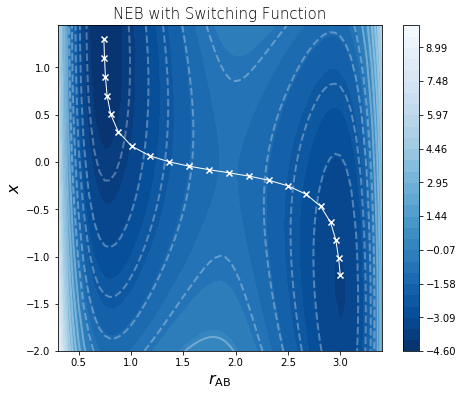

In [125]:
fig = plt.figure(figsize = (16, 6))

ax = fig.add_subplot(1, 2, 1)
C = plt.contourf(rAB_II, x, LEPS_II_arr, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
plt.colorbar()
ax.contour(rAB_II, x, LEPS_II_arr, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("NEB with Switching Function", fontsize = 15, fontweight = 100)
images = np.array(neb_switch_function.images)
ax.scatter(images[:, 0], images[:, 1], color='white', marker = 'x')
ax.plot(images[:, 0], images[:, 1], color='white', linewidth = 1)
_ = ax.set_xlim(0.3, 3.4)

In [126]:
class NEB:
    
    def __init__(self, k):
        self.k = k
        
        
    def interpolate(self, ini, fin, P = 20, dt = 1e-3):
        delta = (fin - ini) / P
        images = []
        for i in range(P):
            images.append(ini + i * delta)
        images.append(fin)
        self.images = images
        self.dt = dt
        
        
    def minimize(self, nsteps, F, V):
        
        if not hasattr(self, 'images'):
            print("Interpolate first!")
            return
        R = self.images
        P = len(R) - 1
        k = self.k
        for _ in range(nsteps):
            for i in range(1, P):
                V_i_next = V(*R[i + 1])
                V_i = V(*R[i])
                V_i_prev = V(*R[i - 1])
                q_hat = 0
                if V_i_next > V_i_prev:
                    if V_i_next >= V_i and V_i >= V_i_prev:
                        q_hat = R[i + 1] - R[i]
                    else:
                        q_hat = (R[i + 1] - R[i]) * max(np.abs(V_i_next - V_i), np.abs(V_i - V_i_prev))
                        q_hat += (R[i] - R[i - 1]) * min(np.abs(V_i_next - V_i), np.abs(V_i - V_i_prev))
                else:
                    if V_i_next <= V_i and V_i <= V_i_prev:
                        q_hat = R[i] - R[i - 1]
                    else:
                        q_hat = (R[i + 1] - R[i]) * min(np.abs(V_i_next - V_i), np.abs(V_i - V_i_prev))
                        q_hat += (R[i] - R[i - 1]) * max(np.abs(V_i_next - V_i), np.abs(V_i - V_i_prev))
                q_hat /= np.linalg.norm(q_hat)
                f = F(*R[i]) - np.dot(F(*R[i]), q_hat) * q_hat
                f_spring = (k[i] * (R[i + 1] - R[i])  - k[i - 1] * (R[i] - R[i - 1]))
                f_spring_parallel = np.dot(f_spring, q_hat) * q_hat
                f += f_spring_parallel
                R[i] = R[i] + self.dt * f

In [127]:
ini = np.array([0.742, 1.3])
fin = np.array([3.0, -1.2])

P = 20
neb_updated_tangent = NEB(np.full(P, 30.0))
neb_updated_tangent.interpolate(ini, fin, P)
neb_updated_tangent.minimize(2000, LEPS_II().F, LEPS_II().V)

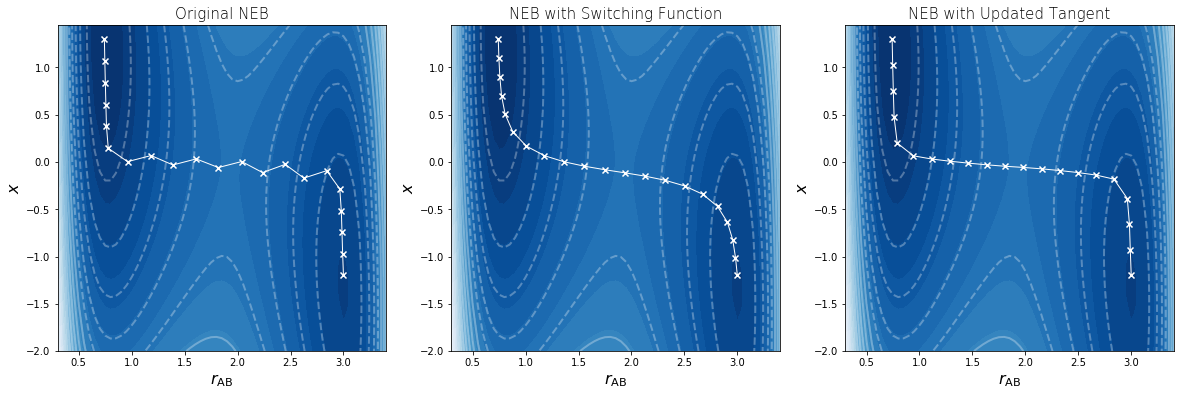

In [132]:
fig = plt.figure(figsize = (20, 6))

ax = fig.add_subplot(1, 3, 1)
C = plt.contourf(rAB_II, x, LEPS_II_arr, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
ax.contour(rAB_II, x, LEPS_II_arr, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("Original NEB", fontsize = 15, fontweight = 100)
images = np.array(neb_II.images)
ax.scatter(images[:, 0], images[:, 1], color='white', marker = 'x')
ax.plot(images[:, 0], images[:, 1], color='white', linewidth = 1)
_ = ax.set_xlim(0.3, 3.4)

ax = fig.add_subplot(1, 3, 2)
C = plt.contourf(rAB_II, x, LEPS_II_arr, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
ax.contour(rAB_II, x, LEPS_II_arr, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("NEB with Switching Function", fontsize = 15, fontweight = 100)
images = np.array(neb_switch_function.images)
ax.scatter(images[:, 0], images[:, 1], color='white', marker = 'x')
ax.plot(images[:, 0], images[:, 1], color='white', linewidth = 1)
_ = ax.set_xlim(0.3, 3.4)

ax = fig.add_subplot(1, 3, 3)
C = plt.contourf(rAB_II, x, LEPS_II_arr, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
ax.contour(rAB_II, x, LEPS_II_arr, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
ax.set_ylabel('$x$', fontsize = 16)
ax.set_title("NEB with Updated Tangent", fontsize = 15, fontweight = 100)
images = np.array(neb_updated_tangent.images)
ax.scatter(images[:, 0], images[:, 1], color='white', marker = 'x')
ax.plot(images[:, 0], images[:, 1], color='white', linewidth = 1)
_ = ax.set_xlim(0.3, 3.4)

- Including a part of the perpendicular force using a switching function leads to corner cutting as can be seen in the 2nd subplot of the above image.
- The tangent was updated to remove the problem of kinks, and the result of that implementation can be seen in the 3rd subplot of the above image.